In [2]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [3]:
"""

https://help.aliyun.com/document_detail/197194.html
行人区域进入检测
行人区域进入检测基于深度学习算法，检测视频监测周界或区域是否有人员入侵。

厂区安全监测：监测保密区域、危险区域是否有人员进入，保证工厂生产安全。
轨道交通安全：监测轨道交通的轨道等关键区域是否有人员进入，保障运行安全。

"""

from aliyunsdkfacebody.request.v20191230.DetectPedestrianIntrusionRequest import DetectPedestrianIntrusionRequest

request = DetectPedestrianIntrusionRequest()
request.set_accept_format('json')

filepath="images/manyperson.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)
request.set_RegionType("rectangle")
request.set_DetectRegion("[{\"Rect\":{\"Left\":30,\"Top\":26,\"Right\":125,\"Bottom\":205}}]")

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '16E83900-9267-5342-A78D-A76BB7A47836', 'Data': {'ImageHeight': 205, 'ImageWidth': 512, 'Elements': [{'BoxId': 0, 'Score': 0.934467077255249, 'Type': 'person', 'IsIntrude': False, 'Box': {'Left': 209, 'Top': 4, 'Right': 448, 'Bottom': 205}}, {'BoxId': 1, 'Score': 0.8735756874084473, 'Type': 'person', 'IsIntrude': True, 'Box': {'Left': 33, 'Top': 24, 'Right': 202, 'Bottom': 205}}, {'BoxId': 2, 'Score': 0.8601508140563965, 'Type': 'person', 'IsIntrude': True, 'Box': {'Left': 185, 'Top': 7, 'Right': 254, 'Bottom': 204}}, {'BoxId': 3, 'Score': 0.7426831722259521, 'Type': 'person', 'IsIntrude': True, 'Box': {'Left': 120, 'Top': 9, 'Right': 208, 'Bottom': 205}}, {'BoxId': 4, 'Score': 0.722545862197876, 'Type': 'person', 'IsIntrude': False, 'Box': {'Left': 211, 'Top': 30, 'Right': 334, 'Bottom': 205}}]}, 'Code': ''}


In [ ]:
Height=response['Data']['ImageHeight']
Width=response['Data']['ImageWidth']

In [4]:
response['Data']['Elements']

[{'BoxId': 0,
  'Score': 0.934467077255249,
  'Type': 'person',
  'IsIntrude': False,
  'Box': {'Left': 209, 'Top': 4, 'Right': 448, 'Bottom': 205}},
 {'BoxId': 1,
  'Score': 0.8735756874084473,
  'Type': 'person',
  'IsIntrude': True,
  'Box': {'Left': 33, 'Top': 24, 'Right': 202, 'Bottom': 205}},
 {'BoxId': 2,
  'Score': 0.8601508140563965,
  'Type': 'person',
  'IsIntrude': True,
  'Box': {'Left': 185, 'Top': 7, 'Right': 254, 'Bottom': 204}},
 {'BoxId': 3,
  'Score': 0.7426831722259521,
  'Type': 'person',
  'IsIntrude': True,
  'Box': {'Left': 120, 'Top': 9, 'Right': 208, 'Bottom': 205}},
 {'BoxId': 4,
  'Score': 0.722545862197876,
  'Type': 'person',
  'IsIntrude': False,
  'Box': {'Left': 211, 'Top': 30, 'Right': 334, 'Bottom': 205}}]

In [11]:
response['Data']['Elements'].__len__()

5

0 False
1 True
2 True
3 True
4 False


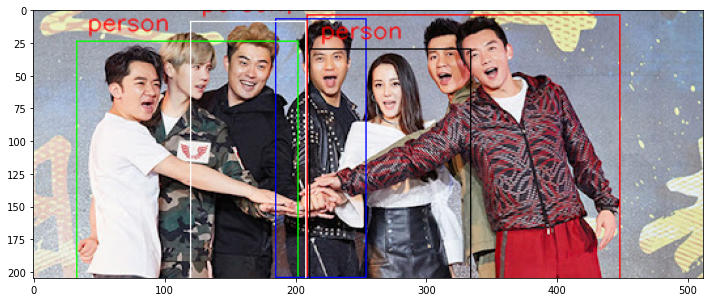

In [18]:
# left, top, right, bottom
plt.figure(figsize=(12,10))
res=plt.imread(filepath)
font = cv2.FONT_HERSHEY_SIMPLEX
# 1. R 2. G 3. B 4. RGB 5. 000
colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,255),(0,0,0)]
for data in response['Data']['Elements']:
    print(data['BoxId'],data['IsIntrude'])
    Type=data["Type"]
    left=(data['Box']["Left"],data['Box']['Top'])
    bottom=(data['Box']['Right'],data['Box']['Bottom'])
    cv2.putText(res,Type,(data['Box']["Left"]+8,data['Box']['Top']-8), font, 0.6,(255,0,0),1,cv2.LINE_AA)
    res=cv2.rectangle(res,left,bottom,colors[data['BoxId']],1)
plt.imshow(res)